<a href="https://colab.research.google.com/github/Katte1807/Metodos-Estadisticos/blob/main/Katterine_Cardozo_y_Oswaldo__Lectura_2_Analisis_Descriptivo_Multivariado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Analisis descriptivo multivariado.***

## ***Universidad Central***

## ***Maestría en analítica de datos***

## ***Métodos estadísticos para analítica de datos.***
## ***Docente: Luis Andrés Campos Maldonado.***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
##
sns.set_theme(style="whitegrid")

## ***Cereal***

Vamos a cargar la base de datos de Cereal, que contiene información nutricional de diferentes marcas de cereales.

In [ ]:
url = "https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/Cereal.csv"
df = pd.read_csv(url, sep=";", decimal=",", index_col=0)
df.head()

,Fabrica,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio,Vitaminas
Cereal,,,,,,,,,,
100% Bran,N,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,848.48485,enriched
All-Bran,K,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,969.69697,enriched
All-Bran with Extra Fiber,K,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,660.00000,enriched
Apple Cinnamon Cheerios,G,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,93.33333,enriched
Apple Jacks,K,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,30.00000,enriched


Observamos los tipos de datos en cada una de las columna del DataFrame.

In [ ]:
df.dtypes

,0
Fabrica,object
Calorias,float64
Proteina,float64
Grasa,float64
Sodio,float64
Fibra,float64
Carbohidratos,float64
Azucares,float64
Potasio,float64
Vitaminas,object


Con el método [`select_dtypes()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) podemos obtener las columnas cuyos valores son numéricos.

In [ ]:
df.select_dtypes(np.number)

,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio
Cereal,,,,,,,,
100% Bran,212.12121,12.121212,3.030303,393.93939,30.303030,15.15152,18.181818,848.48485
All-Bran,212.12121,12.121212,3.030303,787.87879,27.272727,21.21212,15.151515,969.69697
All-Bran with Extra Fiber,100.00000,8.000000,0.000000,280.00000,28.000000,16.00000,0.000000,660.00000
Apple Cinnamon Cheerios,146.66667,2.666667,2.666667,240.00000,2.000000,14.00000,13.333333,93.33333
Apple Jacks,110.00000,2.000000,0.000000,125.00000,1.000000,11.00000,14.000000,30.00000
...,...,...,...,...,...,...,...,...
Triples,146.66667,2.666667,1.333333,333.33333,0.000000,28.00000,4.000000,80.00000
Trix,110.00000,1.000000,1.000000,140.00000,0.000000,13.00000,12.000000,25.00000
Wheat Chex,149.25373,4.477612,1.492537,343.28358,4.477612,25.37313,4.477612,171.64179


In [ ]:
## Así mismo con las columnas de tipo "object"
df.select_dtypes(include=["object"])

,Fabrica,Vitaminas
Cereal,,
100% Bran,N,enriched
All-Bran,K,enriched
All-Bran with Extra Fiber,K,enriched
Apple Cinnamon Cheerios,G,enriched
Apple Jacks,K,enriched
...,...,...
Triples,G,enriched
Trix,G,enriched
Wheat Chex,R,enriched


#### ***Ejercicio 1.***

Realice un conocimiento del dataset, busque revelar hechos importantes en este conjunto de datos. Liste sus hallazgos.

***Respuesta:***

Con los atributos que tiene la base de datos, podriamos analizar lo siguiente:

1.Podemos clasificar que cereales tienen mayor valor nutritivo y los que  menos valor nutritivo tienen de acuerdo a su contenido  Azucares, grasa carbohidratos.

2. Se pueden realizar correlacion de variables, para identificar  que variables se relacionan entre si y si po rejemplo un cereal con alto valor de calorias puede ser un cereal con alto contenido en azucares.

3. Como tenemos las marcas de los cereales, podriamos analizar que marcan producen cereales mas saludables y cuales no.






## ***Matriz de covarianzas y de correlación.***

Cuando se tiene un conjunto de variables cuantitativas, por cada par de ellas se calcula la covarianza:

$$Cov(X,Y)=\frac{1}{n-1}\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})$$

Estos valores conformarán la matriz de covarianzas.
El coeficiente de correlación lineal se define como:

$$\rho_{XY}=\frac{Cov(X;Y)}{sd(X)sd(Y)}$$


In [ ]:
## Matriz de varianzas-covarianzas
df.select_dtypes(np.number).cov()

,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio
Calorias,3895.242099,116.442850,60.674383,4310.041188,148.608725,416.865952,180.380317,5362.723526
Proteina,116.442850,6.983432,1.790252,197.706130,13.122839,12.243296,2.850421,401.040187
Grasa,60.674383,1.790252,2.713399,55.851817,2.284043,2.550715,3.995474,96.005854
Sodio,4310.041188,197.706130,55.851817,17064.098428,396.983157,468.557877,161.021552,13109.507474
Fibra,148.608725,13.122839,2.284043,396.983157,37.618644,10.547819,5.329678,1065.826587
Carbohidratos,416.865952,12.243296,2.550715,468.557877,10.547819,71.714955,-2.017438,369.551907
Azucares,180.380317,2.850421,3.995474,161.021552,5.329678,-2.017438,34.050018,285.976158
Potasio,5362.723526,401.040187,96.005854,13109.507474,1065.826587,369.551907,285.976158,32503.973299


In [ ]:
### Matriz de correlación lineal de pearson
df.select_dtypes(np.number).corr().round(4)

,Calorias,Proteina,Grasa,Sodio,Fibra,Carbohidratos,Azucares,Potasio
Calorias,1.0000,0.7060,0.5902,0.5287,0.3882,0.7887,0.4953,0.4766
Proteina,0.7060,1.0000,0.4113,0.5727,0.8096,0.5471,0.1848,0.8418
Grasa,0.5902,0.4113,1.0000,0.2596,0.2261,0.1829,0.4157,0.3233
Sodio,0.5287,0.5727,0.2596,1.0000,0.4955,0.4236,0.2112,0.5566
Fibra,0.3882,0.8096,0.2261,0.4955,1.0000,0.2031,0.1489,0.9639
Carbohidratos,0.7887,0.5471,0.1829,0.4236,0.2031,1.0000,-0.0408,0.2420
Azucares,0.4953,0.1848,0.4157,0.2112,0.1489,-0.0408,1.0000,0.2718
Potasio,0.4766,0.8418,0.3233,0.5566,0.9639,0.2420,0.2718,1.0000


La matriz anterior muestra la relación lineal entre cada par de variables, por su supuesto en la diagonal principal tenemos la correlación de la variable con ella misma, es decir 1.

#### ***Ejercicio 2.***

Haga uso de `plotly_express` para construir un scatter plot de las siguientes variables:

- Potasio vs. Fibra



In [ ]:
import plotly.express as px
import pandas as pd

# Se crea el scatter plot de Potasio vs Fibra
fig = px.scatter(df, x='Potasio', y='Fibra', title='Potasio vs Fibra', labels={'Potasio': 'Potasio (mg)', 'Fibra': 'Fibra (g)'})

# Visualizacion del gráfico
fig.show()


La relación de las variables anteriores muestra que al parecer a mayor contenido de Potasio se incrementa la fibra.

#### ***Ejercicio 3.***

Obtenga el valor de esta correlación haciendo uso de código.

***Respuesta:***

Con el resultado, podemos analizar que existe una  relación fuerte y positiva entre el Potasio y la Fibra, y que a medida que aumenta el contenido de Potasio en los cereales, también tiende a aumentar el contenido de Fibra.


In [ ]:
# Calcular la matriz de correlación de las dos variables
correlation_matrix = df[['Potasio', 'Fibra']].corr()

# Mostrar la matriz de correlación
print(correlation_matrix)


          Potasio     Fibra
Potasio  1.000000  0.963866
Fibra    0.963866  1.000000


Recuerde que muchas veces un plot dice más que mil palabras... Veamos la matriz de correlación con un mapa de calor

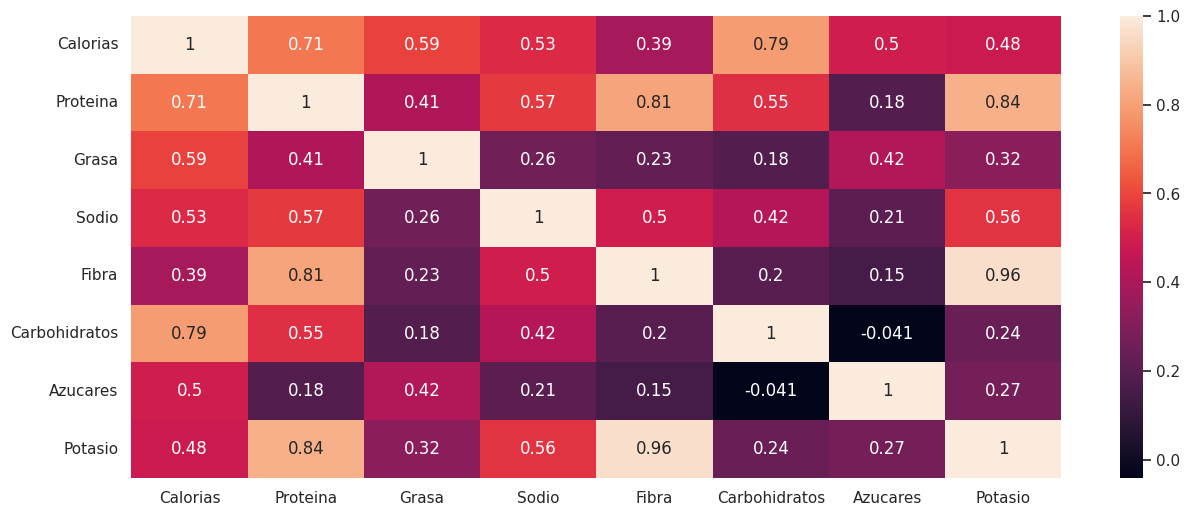

In [ ]:
## Mapa de calor de la matriz de correlación.
plt.figure(figsize=(15,6))
sns.heatmap(df.select_dtypes(np.number).corr(), annot=True)
plt.show()

## ***Diagramas de dispersión***

El diagrama de dispersión sirve para visualizar relaciones entre un par de variables cuantitativas.


#### ***Ejercicio 5.***

Construya un `pairplot` de todas las variables numéricas en el conjunto de datos, y la diagonal presente un kde-plot.

***Respuesta:***


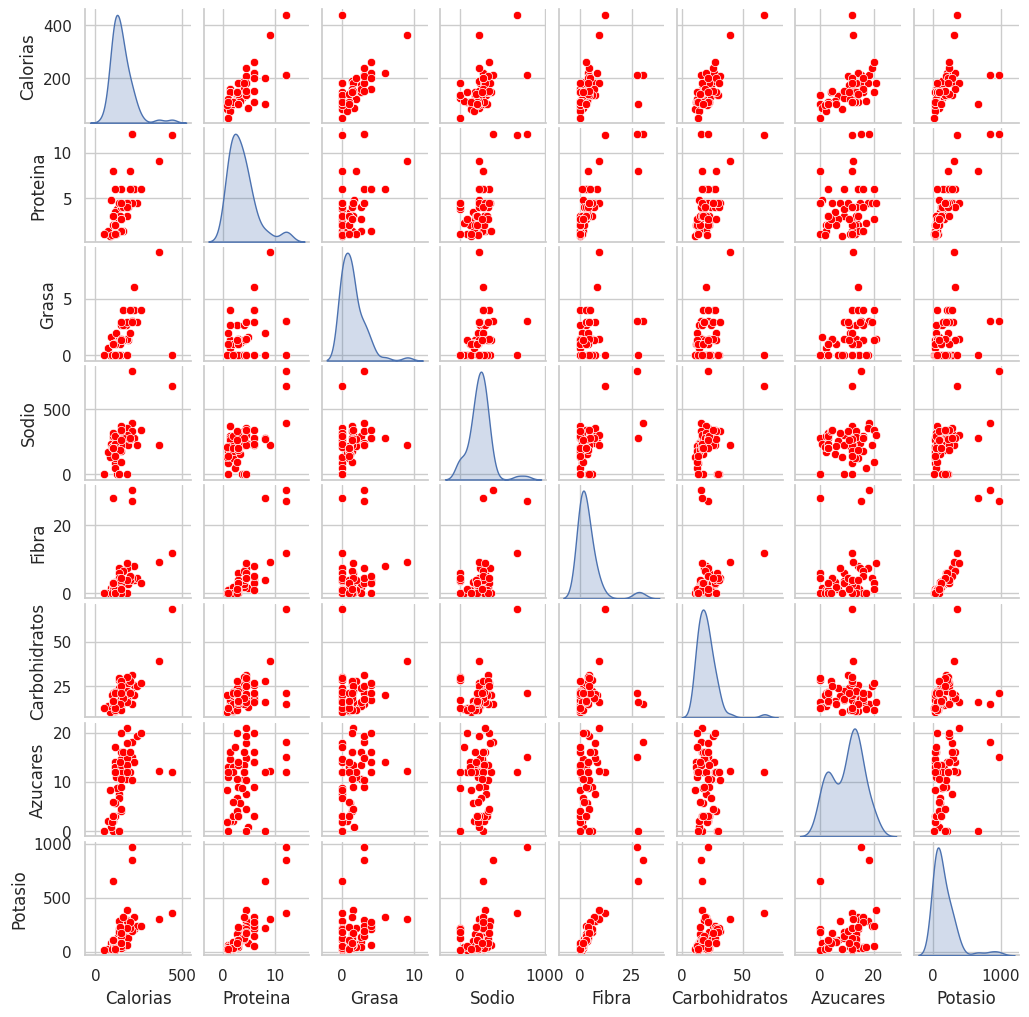

In [ ]:
## Celda de código para probar.
g = sns.pairplot(df.select_dtypes(np.number), diag_kind="kde", plot_kws={"color":"red"})
g.fig.set_size_inches(10,10)

Un plot más dinámico incluyendo el nombre del cereal lo podemos ver con el siguiente código:

In [ ]:
## Scatter plot entre Carbohidratos y Azucares. use hover_name = df.index
## Complete el siguiente código
## fig = px.?????(df, x = ???? , y = ????, ?????=?????)
## ???.show()

import plotly.express as px
fig=px.scatter(df, x="Carbohidratos", y="Azucares", hover_name=df.index)
fig.update_layout(title={"text":"COMPARACIÓN DE CARBOHIDRATOS VS AZÚCARES", "y":0.95, "x":0.5, "xanchor":'center', "yanchor":'top'}, title_font=dict(size=15, color="blue"), width=800, height=400)
fig.show()

Replique los mismos gráficos mostrando un scatter-plot de:

- Potasio vs. Sodio
- Proteina vs. Fibra

In [ ]:
#Grafico de comparación de dispersión de Potasio vs Sodio para cada uno de los Cereales

import plotly.express as px
fig2=px.scatter(df, x="Potasio", y="Sodio", hover_name=df.index)
fig2.update_layout(title={"text": "COMPARACIÓN DE POTASIO VS SODIO", "y":0.95, "x":0.5,"xanchor":"center", "yanchor":"top"}, title_font=dict(size=15, color="blue"), width=800, height=400)
fig2.show()

In [ ]:
#Grafico de comparación de dispersión de Proteina vs Fibra para cada uno de los Cereales

import plotly.express as px
fig3=px.scatter(df, x="Potasio", y="Sodio", hover_name=df.index)
fig3.update_layout(title={"text": "COMPARACIÓN DE PROTEINA vs FIBRA", "y":0.95, "x":0.5,"xanchor":"center", "yanchor":"top"}, title_font=dict(size=15, color="blue"), width=800, height=400)
fig3.show()

## ***Tablas de contingencia.***

Vamos a hacer uso de [`pd.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) para construir una tabla de contingencia, recordando que dicha tabla contiene los conteos de una o más variables cualitativas.

In [ ]:
url="https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/PruebaSaber1.csv"
df_icfes1 = pd.read_csv(url, sep=";", encoding="latin1", low_memory=False)
df_icfes1.shape

(10000, 78)

In [ ]:
crosstab = pd.crosstab(df_icfes1["FAMI_CUARTOSHOGAR"], df_icfes1["FAMI_NIVEL_SISBEN"])
crosstab

FAMI_NIVEL_SISBEN,Esta clasificada en otro nivel del SISBEN,Estrato 1,Nivel 1,Nivel 2,Nivel 3,No est clasificada por el SISBEN
FAMI_CUARTOSHOGAR,,,,,,
Cinco,3,0,116,72,7,72
Cuatro,13,0,371,299,70,291
Diez o m s,0,0,1,3,1,3
Dos,35,0,1757,1059,199,758
Nueve,0,0,4,2,0,0
Ocho,0,0,7,5,1,5
Seis,0,0,38,22,4,21
Siete,0,0,11,10,1,6
Tres,47,0,1475,1076,276,936


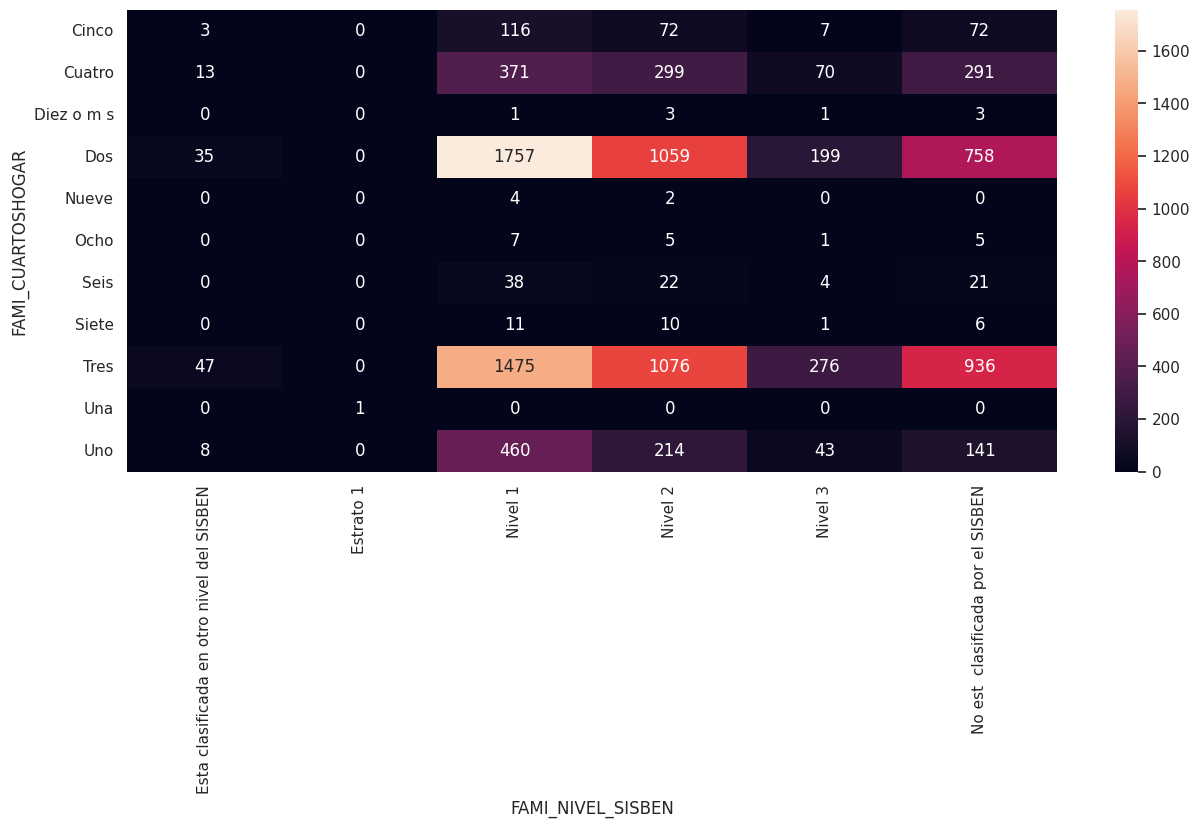

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(crosstab, annot=True,fmt=".0f")
plt.show()

#### ***Ejercicio 5.***

¿Que puede comentar del mapa de calor anterior?

#### ***Respuesta***

1. se puede comentar que se ve una relacion que en los hogares que mas se tienes cuartos, es el nivel 1

2. Se puede observar que en los niveles 1 y 2 vemos que la mayoria de hogares tienen 2 cuartos

3. los valores que no estan clasificados con el sisben son datos representativos que nos puede alterar un analisis de datos.



## ***Otros gráficos multivariados.***


In [ ]:
df_group = df_icfes1.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"], as_index=False).size()
df_group

,FAMI_CUARTOSHOGAR,FAMI_NIVEL_SISBEN,size
0,Cinco,Esta clasificada en otro nivel del SISBEN,3
1,Cinco,Nivel 1,116
2,Cinco,Nivel 2,72
3,Cinco,Nivel 3,7
4,Cinco,No est clasificada por el SISBEN,72
5,Cuatro,Esta clasificada en otro nivel del SISBEN,13
6,Cuatro,Nivel 1,371
7,Cuatro,Nivel 2,299
8,Cuatro,Nivel 3,70
9,Cuatro,No est clasificada por el SISBEN,291


In [ ]:
fig = px.bar(df_group, x="FAMI_CUARTOSHOGAR", y="size", color="FAMI_NIVEL_SISBEN")
fig.show()

#### ***Ejercicio 6.***

¿Observa lo mismo que en el mapa de calor, o quizá se observa información no percibida antes?

***Respuesta:***

el mapa de color y este grafico muestran lo mismo, pero organizado de diferentes maneras. el ultimo grafico esta mostrando la informacion de manera mas detallada.

#### ***Ejercicio 7.***

En el repositorio de [Github](https://github.com/lacamposm/Metodos_Estadisticos), tenemos más tablas de resultados del ICFES, vamos a importarlas todas y formar un único pandas DataFrame. Construya el `pd.DataFrame` solicitado. Llame este DataFrame `df_icfes`.

In [ ]:
import pandas as pd

# Base URL de los archivos CSV
url = "https://raw.githubusercontent.com/lacamposm/Metodos-Estadisticos/main/data/"

# Lista de nombres de archivos CSV
archivos = [
    "PruebaSaber1.csv", "PruebaSaber2.csv", "PruebaSaber3.csv",
    "PruebaSaber4.csv", "PruebaSaber5.csv", "PruebaSaber6.csv",
    "PruebaSaber7.csv", "PruebaSaber8.csv", "PruebaSaber9.csv",
    "PruebaSaber10.csv", "PruebaSaber11.csv", "PruebaSaber12.csv"
]

# Leer cada archivo CSV desde la URL completa y almacenarlo en una lista de DataFrames
lista_archivos = []
for file in archivos:
    data = pd.read_csv(url + file, sep=";", encoding="latin1")
    lista_archivos.append(data)


# Concatenar todos los DataFrames en uno solo
df_icfes = pd.concat(lista_archivos, ignore_index=True)

print(df_icfes)

<ipython-input-34-8f6ed431694b>:17: DtypeWarning:

Columns (9,57,69) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-34-8f6ed431694b>:17: DtypeWarning:

Columns (9,17,57,69) have mixed types. Specify dtype option on import or set low_memory=False.

<ipython-input-34-8f6ed431694b>:17: DtypeWarning:

Columns (9,17,57,69) have mixed types. Specify dtype option on import or set low_memory=False.



       ESTU_NACIONALIDAD ESTU_GENERO ESTU_FECHANACIMIENTO ESTU_ESTUDIANTE  \
0               COLOMBIA           F           22/06/1991      ESTUDIANTE   
1               COLOMBIA           M           03/11/1994      ESTUDIANTE   
2               COLOMBIA           F           03/11/1995      ESTUDIANTE   
3               COLOMBIA           F           20/11/1995      ESTUDIANTE   
4               COLOMBIA           M           28/08/1995      ESTUDIANTE   
...                  ...         ...                  ...             ...   
112499          COLOMBIA           M           04/07/1990      ESTUDIANTE   
112500          COLOMBIA           F           18/08/1969      ESTUDIANTE   
112501          COLOMBIA           M           25/01/1984      ESTUDIANTE   
112502          COLOMBIA           F           11/10/1996      ESTUDIANTE   
112503          COLOMBIA           F           19/03/1995      ESTUDIANTE   

       ESTU_PAIS_RESIDE ESTU_DEPTO_RESIDE ESTU_MCPIO_RESIDE ESTU_ESTADOCIVI

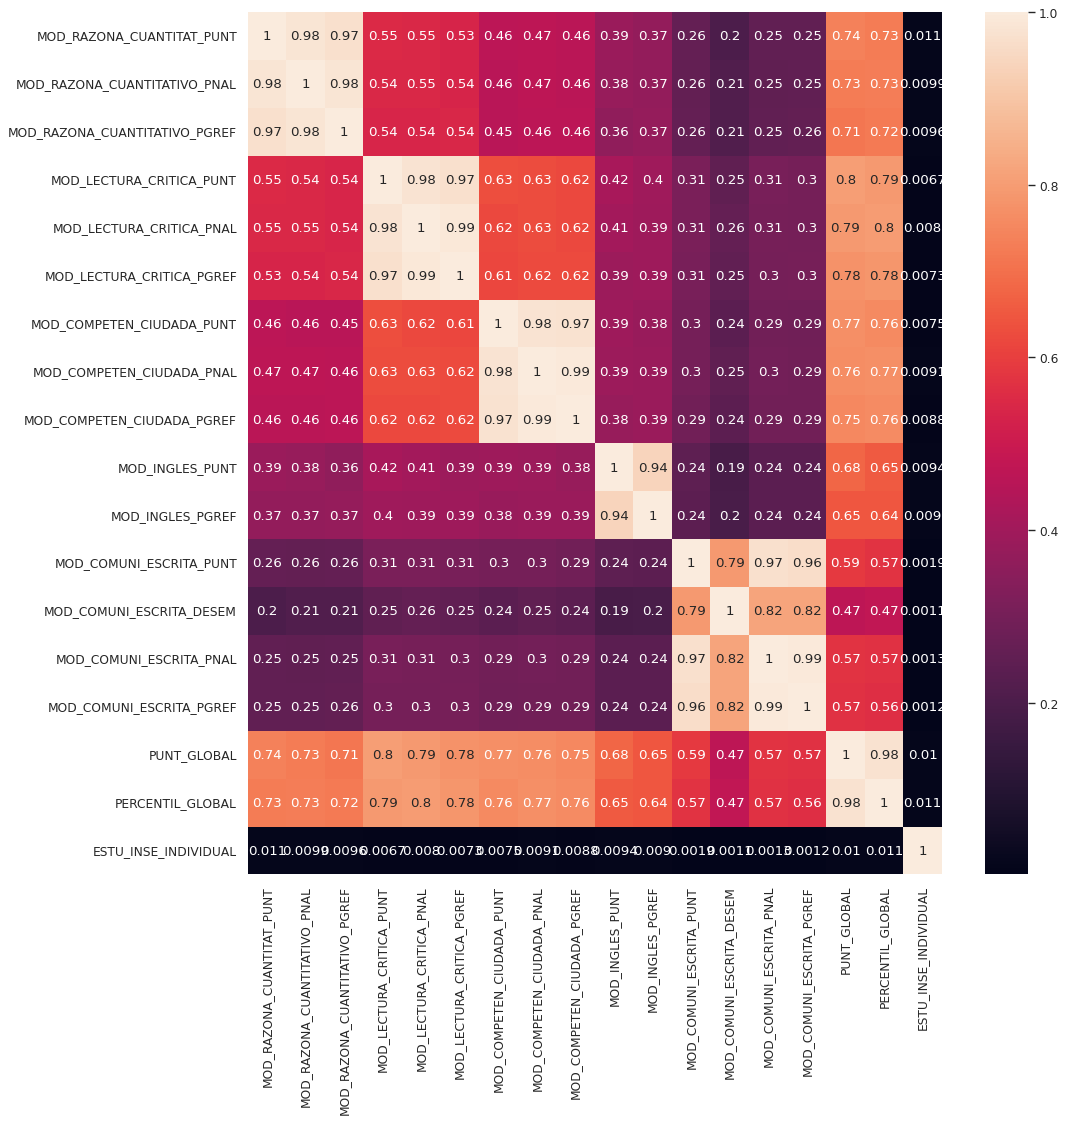

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numerical_df = df_icfes.select_dtypes(include=np.number)

# Calculate the correlation matrix
corre = numerical_df.corr()

# Create the heatmap
plt.figure(figsize=(14, 14), dpi=80)
sns.heatmap(corre, annot=True)
plt.show()

In [ ]:
fig = px.scatter(data_frame=df_icfes, x = "MOD_LECTURA_CRITICA_PUNT", y = "PUNT_GLOBAL",
title = "Scatter-plot: Puntaje Lectura crítica y Puntaje global")
fig.show()

#### ***Ejercicio 8.***

Construya con `plotly_express` un bar plot del conteo de elementos del cruce entre las variables `FAMI_CUARTOSHOGAR` y `FAMI_NIVEL_SISBEN`. En el eje $x$ debe estar la varible `FAMI_CUARTOSHOGAR` mientras que en el eje $y$ el conteo y distinguible por la variable  `FAMI_NIVEL_SISBEN`.

**Hint:** Use el parámetro `color="FAMI_NIVEL_SISBEN"`

In [ ]:
df_grupo1 = df_icfes.groupby(["FAMI_CUARTOSHOGAR", "FAMI_NIVEL_SISBEN"]).size()
df_grupo1 = df_grupo1.reset_index(name="Número de Estudiantes")
fig = px.bar(df_grupo1, x="FAMI_CUARTOSHOGAR", y="Número de Estudiantes", color="FAMI_NIVEL_SISBEN")
fig.show()

#### ***Ejercicio 9.***

Vamos a considerar el DataFrame de las medias para los distintos grupos (en todas las variables numericas) al cruzar las variables género del estudiante (`ESTU_GENERO`) y el departamento (`ESTU_INST_DEPARTAMENTO`). Ademas, cree un scatter-plot de las medias de 2 variables, separadas por género donde además se pueda evidenciar de que departamento se trata.

In [ ]:
df_grupo2 = df_icfes.groupby(["ESTU_GENERO", "ESTU_INST_DEPARTAMENTO"])[ df_icfes.select_dtypes(include=['number']).columns
].mean()
df_grupo2 = df_grupo2.reset_index()
df_grupo2

,ESTU_GENERO,ESTU_INST_DEPARTAMENTO,MOD_RAZONA_CUANTITAT_PUNT,MOD_RAZONA_CUANTITATIVO_PNAL,MOD_RAZONA_CUANTITATIVO_PGREF,MOD_LECTURA_CRITICA_PUNT,MOD_LECTURA_CRITICA_PNAL,MOD_LECTURA_CRITICA_PGREF,MOD_COMPETEN_CIUDADA_PUNT,MOD_COMPETEN_CIUDADA_PNAL,MOD_COMPETEN_CIUDADA_PGREF,MOD_INGLES_PUNT,MOD_INGLES_PGREF,MOD_COMUNI_ESCRITA_PUNT,MOD_COMUNI_ESCRITA_DESEM,MOD_COMUNI_ESCRITA_PNAL,MOD_COMUNI_ESCRITA_PGREF,PUNT_GLOBAL,PERCENTIL_GLOBAL,ESTU_INSE_INDIVIDUAL
0,F,ANTIOQUIA,101.772414,53.034943,54.268046,105.693333,58.797241,58.834483,103.767356,55.794943,55.534713,102.144368,54.313103,106.400924,2.760739,59.833718,59.248961,103.862529,58.614713,100.549658
1,F,ATLANTICO,96.815789,45.671053,47.680099,99.495066,49.660362,50.739309,98.804276,48.567434,49.110197,100.341283,53.285362,100.752902,2.466003,51.095357,49.945274,99.069079,48.935033,133.363980
2,F,BOGOTA,96.969663,45.931150,46.851030,99.762009,50.002411,50.006228,100.119699,50.410588,50.068408,97.818383,48.282069,101.404134,2.529434,52.469595,51.670651,99.081668,49.123154,81.417541
3,F,"BOGOTµ, D.C.",11.000000,109.000000,66.000000,69.000000,129.000000,92.000000,93.000000,107.000000,62.000000,61.000000,66.000000,68.000000,118.000000,3.000000,82.000000,80.000000,114.000000,84.000000
4,F,BOLIVAR,95.093143,43.630286,43.432571,99.786857,50.230857,49.936571,98.901714,48.574286,48.072571,100.458286,50.823429,101.436563,2.524221,52.294694,51.540946,98.965143,48.772000,86.990817
5,F,BOYACA,96.460432,44.863309,46.924460,100.881295,51.410072,52.410072,102.143885,53.428058,53.906475,92.208633,42.607914,104.211679,2.664234,56.029197,54.861314,98.881295,48.568345,48.749746
6,F,BUCARAMANGA,68.000000,103.000000,55.000000,58.000000,103.000000,57.000000,57.000000,90.000000,31.000000,29.000000,10.000000,10.000000,116.000000,3.000000,79.000000,78.000000,97.000000,44.000000
7,F,CALDAS,94.621415,42.338432,47.434034,97.403442,46.806883,52.315488,97.296367,46.191205,51.388145,95.642447,50.070746,103.402724,2.626459,55.324903,59.120623,97.311663,45.468451,45.701468
8,F,CAQUETA,106.714286,59.642857,59.500000,115.357143,68.000000,64.000000,110.785714,61.214286,55.785714,95.857143,44.785714,122.857143,3.571429,84.000000,80.071429,110.214286,68.214286,49.708245
9,F,CAUCA,96.644231,45.043269,45.197115,96.764423,45.423077,47.317308,98.538462,47.923077,50.307692,94.750000,45.076923,99.497585,2.454106,49.652174,51.903382,97.134615,45.317308,239.199711


In [ ]:
fig = px.scatter(df_grupo2, x = "MOD_RAZONA_CUANTITAT_PUNT", y = "MOD_LECTURA_CRITICA_PGREF",title = "Comparación Genero del Estudiante vs Departamento de Origen", color="ESTU_GENERO", hover_name="ESTU_INST_DEPARTAMENTO")
fig.show()

#### ***Ejercicio 10.***

Construya un scatter-plot con `plotly_express` de los promedios de las varibles `MOD_RAZONA_CUANTITAT_PUNT`, `MOD_LECTURA_CRITICA_PUNT` con parámetro `size` igual a la cantidad de elementos en los grupos formados por el par de variables cualitativas `ESTU_GENERO` y `ESTU_INST_DEPARTAMENTO`, separe este plot por el género.

In [ ]:
#Seleccionar solo las columnas numéricas
df_icfes_2 = df_icfes.select_dtypes(include='number').copy()

# Añadir las columnas categóricas necesarias para el análisis
df_icfes_2['ESTU_GENERO'] = df_icfes['ESTU_GENERO']
df_icfes_2['ESTU_INST_DEPARTAMENTO'] = df_icfes['ESTU_INST_DEPARTAMENTO']

# Agrupar y calcular el promedio y contar el número de elementos en cada grupo
df_grupo3 = df_icfes_2.groupby(["ESTU_GENERO", "ESTU_INST_DEPARTAMENTO"]).agg(
    MOD_RAZONA_CUANTITAT_PUNT=('MOD_RAZONA_CUANTITAT_PUNT', 'mean'),
    MOD_LECTURA_CRITICA_PUNT=('MOD_LECTURA_CRITICA_PUNT', 'mean'),
    count=('MOD_RAZONA_CUANTITAT_PUNT', 'size')
).reset_index()

# Crear el gráfico de dispersión
fig = px.scatter(df_grupo3,
                 x="MOD_RAZONA_CUANTITAT_PUNT",
                 y="MOD_LECTURA_CRITICA_PUNT",
                 size="count",
                 color="ESTU_GENERO",
                 hover_name="ESTU_INST_DEPARTAMENTO",
                 title="Promedios de MOD_RAZONA_CUANTITAT_PUNT y MOD_LECTURA_CRITICA_PUNT por Género y Departamento")

# Ajustar el rango de los ejes x e y
fig.update_layout(
    xaxis=dict(range=[90, df_grupo3['MOD_RAZONA_CUANTITAT_PUNT'].max()]),
    yaxis=dict(range=[80, df_grupo3['MOD_LECTURA_CRITICA_PUNT'].max()])
)

fig.show()

Finalmente unos gráficos más.

In [ ]:
fig = px.density_contour(df_icfes, x="MOD_LECTURA_CRITICA_PUNT", y="MOD_RAZONA_CUANTITAT_PUNT")
fig.update_traces(contours_coloring="fill", contours_showlabels=True)
fig.show()

In [ ]:
fig = px.density_contour(df_icfes, x="MOD_RAZONA_CUANTITAT_PUNT", y="MOD_COMPETEN_CIUDADA_PUNT")
fig.update_traces(contours_coloring="fill", contours_showlabels=True)
fig.show()

In [ ]:
df_group2 = pd.concat(
    [df_icfes[["ESTU_GENERO","ESTU_INST_DEPARTAMENTO"]], df_icfes.select_dtypes(np.number)],
     axis=1
 )

df_group2 = df_group2.groupby(["ESTU_GENERO","ESTU_INST_DEPARTAMENTO"], as_index=False).mean()

fig = px.bar_polar(
     df_group2,
     r="MOD_COMUNI_ESCRITA_PUNT",
     theta="ESTU_INST_DEPARTAMENTO",
     color="ESTU_GENERO",
     template="plotly_dark",
     color_discrete_sequence=px.colors.sequential.Plasma_r
 )

fig.show()